# <font color=blue> Disney+ Subscription Content
## <font color=red> Exploratory Data Analysis (EDA)

<a id="0"></a> 
## Content

### Inferernce and Results:

#### [Q1. How does content differ geographically?](#3)

- The content differs widely across the countries
- [the map visualisation gives clear picture on the content distribution](#1)
- The close observation gives us the insights that US is having equal amount of genere content which shows the diversity.
- India on other hand gives more focus on the Dramas,International movies (dubbed_content)
- Japan and south kora focuses on the international TV shows (series)
- Canada is the having moderate genere contents
- UK is having more documentries ratio compared with other genre than any other countries

#### [Q2. Over time, how has the type of content that is being added, changed?](#4)
- It is observed that the trend of adding movies and TV Shoe both declined sharply in the later years, which might be due to the pandemic which started in 2019.
- movie content showed expontential growth during the years 2016 to 2018
- TV shows are constant across the time and regions. 
- more analysis on the ratings are attached below

#### [Q3. Which words recurred, among content Titles and Descriptions?](#5)
- Title: most of the shows or content has "Love" --> universal language , "2" --> signifies the part of various shows (recent trend in the decade)
- Decription: in description as well it has more words like "love", "young", "life", "world", "freinds" createing a more sense on the movie plots
- The US is obsessed with the words Christmas and American in the titles and the plots are described through words like new, life and world 
- India is using their origin languages in the title with love similar words in different synonyms are present and the mumbai is used more often. Their plots are biased with preference to the male actors so the word man is kept repeating.
- In Canada, Trailer, Christmas and monsters are repeated with friends to describe the pltos 


#### [pre analysis Q4](#9)

#### [Q4. Over a year, what changes have occurred in the overall content being added?](#6)
- [various combination of content and timelines are presented here](#2)
- cumulatively the count rate has seen improvement irrespective of the content and regions
- the months November,Decmber,Jan (holiday season) is the highest content being added in all the years
- suprisingly the year 2017 and 2018 follows different pattern paving summer vaccation time to have more content (particularly the TV shows)

##### [Q5. Which is the most popular rating-category?](#8)
- TV Mature Audience is most most popular one 
- No one under 17 is the lowest know rating category in the disney+
- there are 3 UR which is not rated (might be experimental shows)





In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


import plotly.express as px
from wordcloud import WordCloud

import re
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")

## Dataset Description
We are provided with a data about Disney+ contents and the data are to be explored to get key finding or major trends. Different information about the contents are provided which are:
- Show_Id: Unique identifier for the content
- Type: Type of the content : TV Show or a Movie
- Title: Title of the content
- Director: THe ones who directed the tv show or the movie
- Cast: Main characters from the movie or tv show
- Country: Country of origin for the given content. Can have more than one values
- Date Added: The date when the content was added to disney+
- Release Year: The year when the content was released not necessarily in disney+
- Rating: Content rating which indicates its character: Family Friendly, Inclusion of violence, nudity, etc
- Duration: The timeframe length of the content if its a movie and no of seasons if it is a tv show
- listed in: The different genres it belong to or in which genre it can be found in disney+
- description: A short description about the movie or the tv show

## validation

In [2]:
# Import the CSV file, save it in a data frame, and display the top 3 rows
df = pd.read_csv('content.csv')
df.head(3)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...

In [3]:
print('Total no. of rows:',df.shape[0])
print('Total no. of columns:',df.shape[1])

Total no. of rows: 8807
Total no. of columns: 12


## quick_insight
We have a total of 8807 records of the contents in the disney+. Let's check for the validity of the data whether there are any missing informations or if there are any duplicated records.

In [4]:
# info about the columns and its data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


It is found that the datatype for all of the columns except release_year (int) is object. Some of these columns needs to be reformatted before proceeding further.

In [5]:
# change the datatype for date added to datetime for better analysis
df['date_added'] = df['date_added'].apply(pd.to_datetime)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [7]:
df.head(3)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...

## Data Validation and Cleansing
Lets check the data for validity. This includes checking the absence of data, no of unique values in data(as a column with only one value is not relevant for analysis) , range of the data (numeric) and presence of duplicate records.

In [8]:
# putting the column names in a list
column_names = df.columns.tolist()
null_count = df.isnull().sum()
null_ratio = round(df.isnull().mean(),3)
nunique = df.nunique()
#display the dataframe with all the information
pd.DataFrame(np.vstack((column_names,null_count,null_ratio, nunique)).T, 
             columns = ['Columns','Null Count','Null Ratio','Unique Values'])

Columns Null Count Null Ratio Unique Values
0        show_id          0        0.0          8807
1           type          0        0.0             2
2          title          0        0.0          8807
3       director       2634      0.299          4528
4           cast        825      0.094          7692
5        country        831      0.094           748
6     date_added         10      0.001          1714
7   release_year          0        0.0            74
8         rating          4        0.0            17
9       duration          3        0.0           220
10     listed_in          0        0.0           514
11   description          0        0.0          8775

In [9]:
# checking presence of duplicate records
df.duplicated().sum()

0

In [10]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

## quick_insight

'74 min', '84 min', '66 min' seems to be the invalid data lets see what went wrong

In [11]:
invalid_rating = df[df['rating'].isin(['74 min', '84 min', '66 min'])]
invalid_rating

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country date_added  release_year  rating duration  \
5541  Louis C.K.  United States 2017-04-04          2017  74 min      NaN   
5794  Louis C.K.  United States 2016-09-16          2010  84 min      NaN   
5813  Louis C.K.  United States 2016-08-15          2015  66 min      NaN   

     listed_in                                        description  
5541    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813    Movies  The comic puts his trademark hilarious/thought...

## hidden_issue
It seems that the duration of the content was recorded in the rating section. Lets fix this

In [12]:
for i,r in invalid_rating.iterrows():
    df['duration'][i] = r.loc['rating']
    df['rating'][i] = np.nan
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [13]:
#check validity in numerical data
df.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

This can be used to check the range or the distribution of the data and also give initial info about the possible outliers.

## EDA
After validation, the next step would be to explore the data and check for characteristics of the procured dataset using different statistical measures and with the help of visualization using various plots. We will be checking for the distribution of data, how contents are distributed throughout the world, which type of contents are primarily prevalent in the collection, how the trend of contents being added in disney+ throughout the years, etc.

First lets look at the distribution of data.

### Distribution of content type

In [14]:
#Distribution of Type of Contents
type_dist = df['type'].value_counts()
type_dist

Movie      6131
TV Show    2676
Name: type, dtype: int64

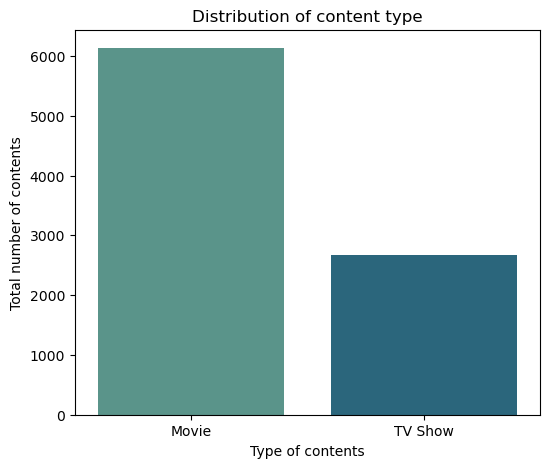

In [15]:
#visualizing the distribution in a barplot
fig = plt.figure(figsize=(6,5)) #setting the figure size
sns.barplot(x = type_dist.index,
                       y = type_dist.values, 
                       palette = 'crest')
plt.xlabel('Type of contents')
plt.ylabel('Total number of contents')
plt.title('Distribution of content type')
plt.show()

### Directors with highest number of contents directed

In [16]:
# Top 20 directors for the contents
top20_dirs = df['director'].value_counts().head(20)
top20_dirs

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Yılmaz Erdoğan             8
Lance Bangs                8
Kunle Afolayan             8
Quentin Tarantino          8
Ryan Polito                8
Troy Miller                8
Shannon Hartman            8
Fernando Ayllón            8
Name: director, dtype: int64

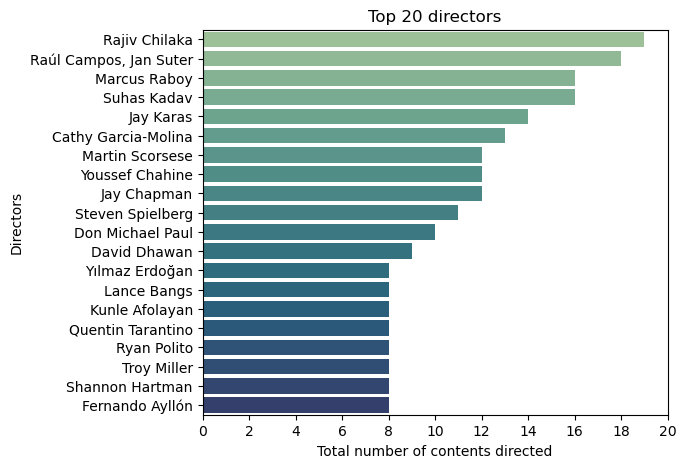

In [17]:
#visualizing the top 20 directors in a barplot
fig = plt.figure(figsize=(6,5)) #setting the figure size
sns.barplot(x = top20_dirs.values,
            y = top20_dirs.index, 
            palette = 'crest',
            )
plt.xlabel('Total number of contents directed')
plt.ylabel('Directors')
plt.title('Top 20 directors')
plt.xticks(range(0,max(top20_dirs)+2,2))

plt.show()


### Most appearing Actors/Actresses

In [18]:
#printing values of cast for top 5 rows
df['cast'].head()

0                                                  NaN
1    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                  NaN
4    Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
Name: cast, dtype: object

Since there are multiple cast members in a TV show or a movie, we will collect all of them in a single collection and find out the count for each.

In [19]:
def combine_and_count_values(data, data_name, top = None):
    # Parameters --> data: column of dataframe, 
    #                data_name: string for name of data, 
    #                top: int if top n numbers needed
    # Returns a dataframe with sorted values by its count

    
    ##combine all the non null values from the data
    data = [d for d in data if not pd.isna(d)]

    #join all the strings into one
    collection = ','.join(data)
    
    #separate them to a list
    list_collection = [c.strip() for c in collection.split(',')]

    #use counter library to get the counts and put them in dataframe
    counter = Counter(list_collection)

    #transpose to get desired output
    df = pd.DataFrame([list(counter.keys()),list(counter.values())]).T
    #setting the name of columns
    df.columns = [data_name,'Count']
    
    if top:
        return df.sort_values('Count', ascending = False, ignore_index = True).head(top) #returns top n elements
    else:
        return df.sort_values('Count', ascending = False,ignore_index = True) # returns all elements

Lets find out top 20 most appearing actors or actress in disney+

In [20]:
top20_actors = combine_and_count_values(df['cast'], 'Cast Member', top=20)
top20_actors

Cast Member Count
0         Anupam Kher    43
1      Shah Rukh Khan    35
2       Julie Tejwani    33
3    Naseeruddin Shah    32
4    Takahiro Sakurai    32
5        Rupa Bhimani    31
6        Akshay Kumar    30
7             Om Puri    30
8           Yuki Kaji    29
9        Paresh Rawal    28
10   Amitabh Bachchan    28
11        Boman Irani    27
12        Rajesh Kava    26
13       Vincent Tong    26
14      Andrea Libman    25
15     Kareena Kapoor    25
16  Samuel L. Jackson    24
17        John Cleese    24
18    Fred Tatasciore    23
19     Jigna Bhardwaj    23

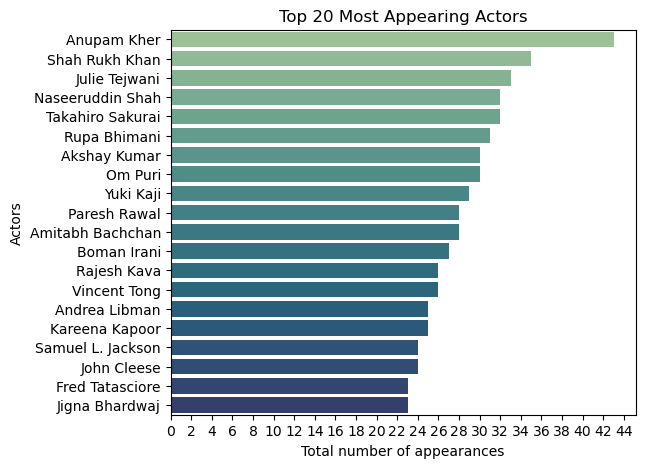

In [21]:
#visualizing the top 20 actors in a barplot
fig = plt.figure(figsize=(6,5)) #setting the figure size
sns.barplot(x = top20_actors['Count'],
            y = top20_actors['Cast Member'], 
            palette = 'crest',
            )
plt.xlabel('Total number of appearances')
plt.ylabel('Actors')
plt.title('Top 20 Most Appearing Actors')
plt.xticks(range(0,max(top20_actors.Count)+2,2))

plt.show()

<a id="3"></a> 
## Question 1

### Largest producer Country

[back](#0)

In [22]:
## Distribution of country
df['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

Let's use the same method as above to find the count as some of the contents were created in multiple countries

In [23]:
country_data = combine_and_count_values(df['country'], 'Country')
country_data

Country Count
0     United States  3690
1             India  1046
2    United Kingdom   806
3            Canada   445
4            France   393
..              ...   ...
118         Ecuador     1
119         Armenia     1
120        Mongolia     1
121         Bahamas     1
122      Montenegro     1

[123 rows x 2 columns]

<a id="1"></a> 
## map_visualization

We can use choropleth to visualize this in a world map.

[back](#0)

In [24]:
import math
def create_map(country_data):
    country_data['log_count'] = [math.log(count) for count in country_data['Count']]
    fig = px.choropleth(country_data, locations='Country',
                        locationmode='country names',
                        color= 'log_count', #use log to color as the difference between counts are significant
                        color_continuous_scale= px.colors.sequential.Hot_r,
                        custom_data=['Country', 'Count']
                       )
    
    fig.update_traces(hovertemplate='<b>%{customdata[0]}</b><br>Count: %{customdata[1]}')
    # update layout figure method
    fig.update_layout(
        title_text='',
        width=1200,
        height=600,
    )
    
    fig.show()
create_map(country_data)

Lets also visualize this in pie chart where only top 10 are shown distinctly.

In [25]:
top_10_countries = country_data[['Country','Count']].head(10)
others = pd.DataFrame([['Others',np.sum(country_data[10:]['Count'])]], columns = ['Country','Count'])
top_countries = pd.concat((top_10_countries,others), axis=0)
top_countries

Country Count
0   United States  3690
1           India  1046
2  United Kingdom   806
3          Canada   445
4          France   393
5           Japan   318
6           Spain   232
7     South Korea   231
8         Germany   226
9          Mexico   169
0          Others  2463

In [26]:
fig = px.pie(top_countries, values='Count', names='Country',         
             hover_data=['Count'], 
             labels={'Country':'Country'},
             title= 'Percentage of contents created per countries',
             height=600,
             width=1200)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title={'x':0.5, 'xanchor': 'center'})
fig.show()

### Content Difference according to the countries

Since USA makes more than 30 percent of the contents available in disney+, it would not be wise to check which country makes most contents for a genre as it would be USA most of the times. So instead, we will find out which content type, rating type and genre is mostly created in a country.

In [27]:
def category_per_country(cat):
    # splitting the data with , as some have multiple values and convert them in a list
    c_df = df['country'].apply(lambda x: [s.strip() for s in x.split(',')] if isinstance(x,str) else x)
    
    # explode creates a new record for each of the data in the list and to frame is to convert it into dataframe
    c_df = c_df.explode().to_frame()

    # create a new column cat where each country gets its value as per the index form original dataframe
    c_df[cat] = c_df.apply(lambda x:df[cat][x.index])

    # create a final table to create dummy variable for each value in table and calculate the count of each cat
    final = c_df.pivot_table(index='country', columns=cat, aggfunc='size', fill_value=0)

    #temp total column to sort the table
    final['total'] = final.sum(axis = 1)
    return final.sort_values('total', ascending = False).drop(columns =['total'])

type_dist = category_per_country('type')
top_10_countries = type_dist.head(10)
top_10_countries.reset_index(inplace = True)
top_10_countries

type         country  Movie  TV Show
0      United States   2752      938
1              India    962       84
2     United Kingdom    534      272
3             Canada    319      126
4             France    303       90
5              Japan    119      199
6              Spain    171       61
7        South Korea     61      170
8            Germany    182       44
9             Mexico    111       58

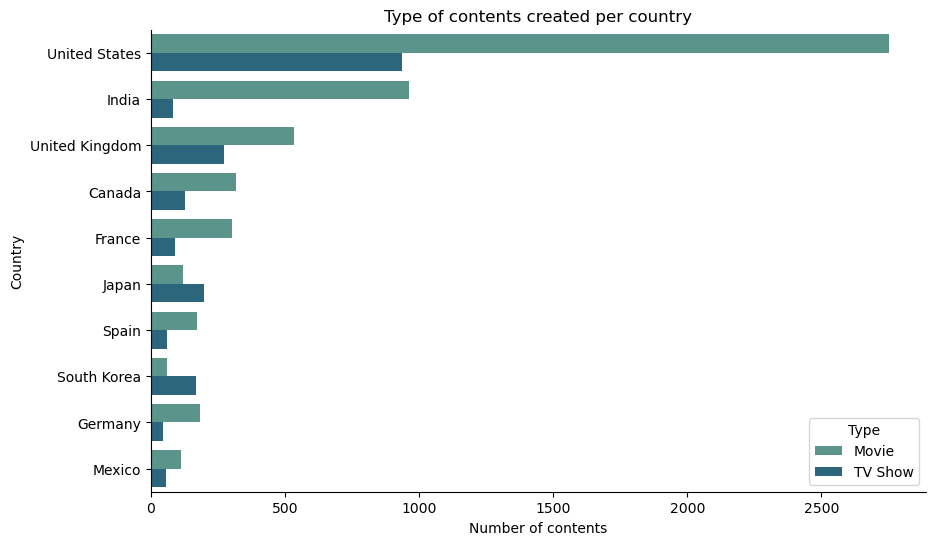

In [28]:
# top_10_countries.plot(x='country'.index, y=["Movie", "TV Show"], kind="bar") 
fig, ax1 = plt.subplots(figsize=(10, 6))
tidy = top_10_countries.melt(id_vars='country').rename(columns=str.title)
sns.barplot(y='Country', x='Value', hue='Type', data=tidy, ax=ax1, palette= 'crest',)
ax1.set_xlabel('Number of contents')
ax1.set_title('Type of contents created per country')
sns.despine(fig)
plt.show()

In [29]:
#creating rating column
rating_dist = category_per_country('rating')
rating_dist

rating           G  NC-17  NR   PG  PG-13    R  TV-14  TV-G  TV-MA  TV-PG  \
country                                                                     
United States   39      1  43  243    433  660    497    89   1101    304   
India            0      0   7    7     11    5    572    10    266    144   
United Kingdom   4      0  12   35     84  145    103    25    253     98   
Canada           2      1   5   33     32   79     49    17    107     39   
France           2      1   4   21     35   57     48     6    163     12   
...             ..    ...  ..  ...    ...  ...    ...   ...    ...    ...   
Jamaica          0      0   0    0      0    0      0     0      1      0   
Slovakia         0      0   0    0      0    0      0     0      1      0   
Nicaragua        0      0   0    0      0    1      0     0      0      0   
Ethiopia         0      0   0    0      0    0      0     0      1      0   
Liechtenstein    0      0   0    0      1    0      0     0      0      0   

rating          TV-Y  TV-Y7  TV-Y7-FV  UR  
country                                    
United States    127    147         2   1  
India              6     17         1   0  
United Kingdom    34     12         0   1  
Canada            45     35         1   0  
France            21     21         0   2  
...              ...    ...       ...  ..  
Jamaica            0      0         0   0  
Slovakia           0      0         0   0  
Nicaragua          0      0         0   0  
Ethiopia           0      0         0   0  
Liechtenstein      0      0         0   0  

[123 rows x 14 columns]

In [30]:
for i,country in rating_dist.head(10).iterrows():
    fig = px.pie(country.index, values=country.values,names = country.index, 
                 labels={'Country':'Country'},
                 title= 'Percentage of contents created per countries',
                 height=600,
                 width=1200)
    fig.update_traces(textposition='outside', textinfo='percent+label')
    fig.update_layout(title={'x':0.5, 'xanchor': 'center'})
    fig.show()

## creating genre based table for the top 10 countries 

In [31]:
def genere_per_country(data,count_list,top_number):
    """
    arg: data --> gets the dataframe to check and unstack the generes present in the data
    arg: count_list --> column which needs to be calculated
    arg: top_number--> most values required
    func: explode the genre column and get thhe top 10 countries most popular generes overall 
    return: data table for plot, top counts of the column
    """
    data=data.copy()
    new_column='new_{}'.format(count_list)
    
    data[new_column]=data[count_list].str.split(', ')
    temp_explode=data.explode(new_column)
    top_countries_content=temp_explode['country'].value_counts().head(10).index
    temp_explode_1=temp_explode[temp_explode['country'].isin(top_countries_content)]
    top_new_col_count=temp_explode_1[new_column].value_counts().head(top_number).index
    temp_explode_2=temp_explode_1[temp_explode_1[new_column].isin(top_new_col_count)]
    final_table_group=temp_explode_2.groupby(['country',new_column]).size().unstack()
    count_table = temp_explode_2.groupby(['country', new_column]).size().reset_index(name='count')
    final_table_group=final_table_group.fillna(0).astype(int)
    
    return top_new_col_count,final_table_group,count_table

In [32]:
#calling the function
top_genere,grp_df,count_table=genere_per_country(df,'listed_in',5)

In [33]:
#top genre based on the cumulative counts for a country 
top_genere

Index(['Dramas', 'International Movies', 'Comedies', 'International TV Shows',
       'Documentaries'],
      dtype='object')

In [34]:
#grouped table on the top 10 countries and their top genre
grp_df

new_listed_in   Comedies  Documentaries  Dramas  International Movies  \
country                                                                 
Canada                39             21      22                    26   
France                18             24      31                    68   
India                308             19     620                   817   
Japan                  0              0      12                    58   
Mexico                17             10      24                    49   
South Korea            6              1      21                    38   
Spain                 34             17      37                    90   
Turkey                56              0      27                    74   
United Kingdom        32             84      45                    66   
United States        524            411     591                    21   

new_listed_in   International TV Shows  
country                                 
Canada                              19  
France                              32  
India                               65  
Japan                              141  
Mexico                              35  
South Korea                        149  
Spain                               46  
Turkey                              29  
United Kingdom                     112  
United States                       27

The above grou_by table gives overall understanding of the genere based contents created in various countries. 

- The close observation gives us the insights that US is having equal amount of genere content which shows the diversity.
- India on other hand gives more focus on the Dramas,International movies (dubbed_content)
- Japan and south kora focuses on the international TV shows (series)
- Canada is the having moderate genere contents
- UK is having more documentries ratio compared with other genre than any other countries 

In [35]:
## visualization of the above sorted table 

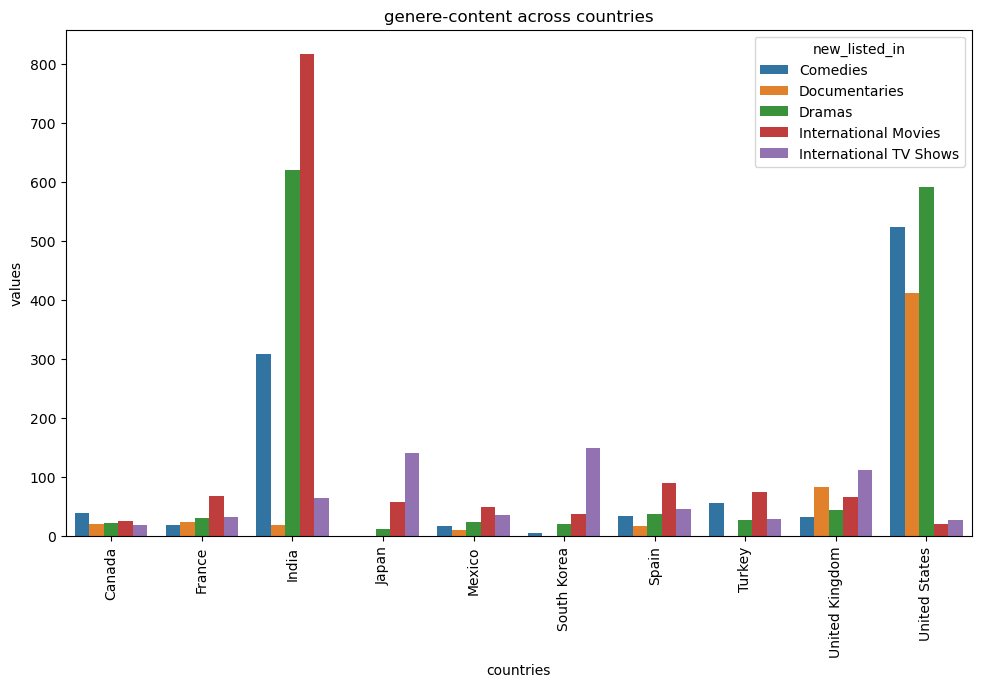

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(y='count',x='country',hue='new_listed_in',data=count_table)
plt.xlabel('countries')
plt.ylabel('values')
plt.title('genere-content across countries')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

<a id="4"></a> 
## Question 2

### Type over the time
 different contents were added. since disney+ is a fairly new platform, the contents should be mostly added during the last 5 years. 

[back](#0)

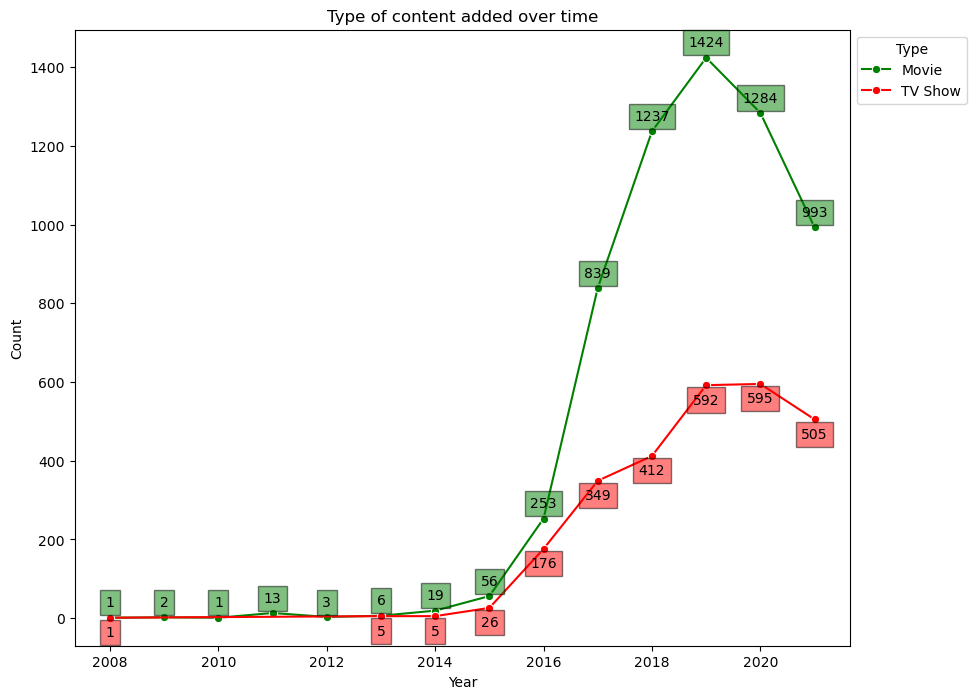

In [37]:
va=['top','bottom']
color = ['red','green']
margin = [-20,20]
plt.figure(figsize=(10,8))
for t in df['type'].unique():
    a = df[df['type']==t]
    #grouping by just the year of the date added
    year_group = a.groupby(df['date_added'].map(lambda x: x.year))['show_id'].count()
    color_ = color.pop()
    va_ = va.pop()
    margin_ = margin.pop()
    sns.lineplot(x = year_group.index,
                 y = year_group.values,
                 label = t,
                 color = color_, 
                 marker = 'o')
    
    for x, y in zip(year_group.index,year_group.values):
        plt.text(x,
                 y+margin_,
                 y,
                 horizontalalignment='center',
                 verticalalignment=va_,
                 bbox=dict(facecolor=color_, alpha = 0.5)) #some decorations
# Add labels and title
plt.title('Type of content added over time')
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

It is observed that the trend of adding movies and TV Shoe both declined sharply in the later years, which might be due to the pandemic which started in 2019.

<a id="5"></a> 
### Popular Word Choices

#### Popular word choices for the title of the contents
To find the populating of a text snippet we can use word cloud which accumulates all the word and creates a word collection whose size is propertionate to the number of time it hads been used.

[back](#0)

In [38]:
from nltk.corpus import stopwords


In [39]:
stop_words = stopwords.words('english')

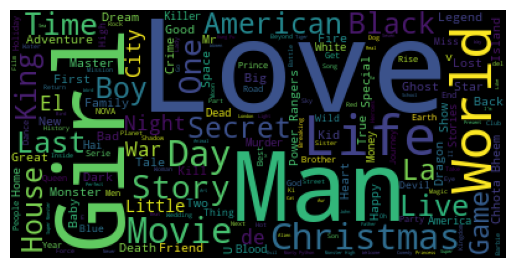

In [100]:

titles = df['title']
# Create and generate a word cloud image:
title_wordcloud = WordCloud(stopwords=stop_words).generate(' '.join(titles))

# Display the generated image:
plt.imshow(title_wordcloud)
plt.axis("off")
plt.show()


In [101]:
# title_wordcloud.words_

In [102]:
# df[df['country']=='India']['title']

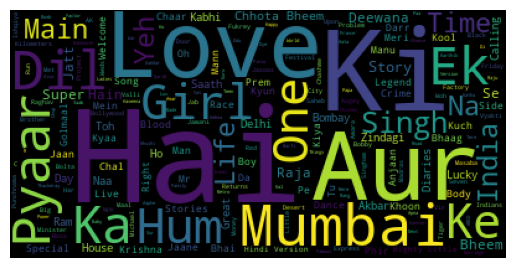

In [103]:

titles = df[df['country']=='India']['title']
# Create and generate a word cloud image:
title_wordcloud = WordCloud(stopwords=stop_words).generate(' '.join(titles))

# Display the generated image:
plt.imshow(title_wordcloud)
plt.axis("off")
plt.show()


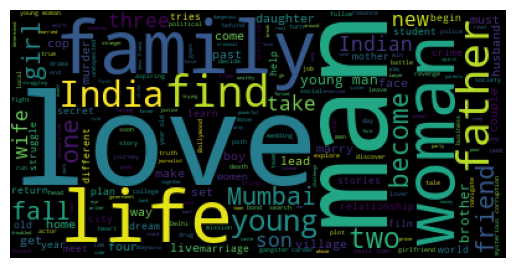

In [104]:
desc = df[df['country']=='India']['description']
# Create and generate a word cloud image:
desc_wordcloud = WordCloud(stopwords=stop_words).generate(' '.join(desc))

# Display the generated image:
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.show()

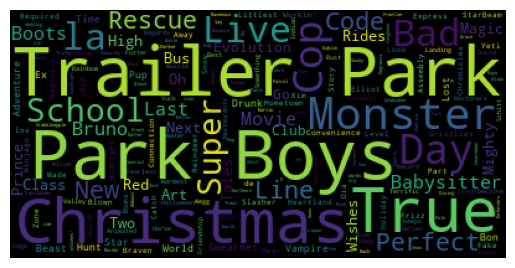

In [107]:
titles = df[df['country']=='Canada']['title']
# Create and generate a word cloud image:
title_wordcloud = WordCloud(stopwords=stop_words).generate(' '.join(titles))

# Display the generated image:
plt.imshow(title_wordcloud)
plt.axis("off")
plt.show()


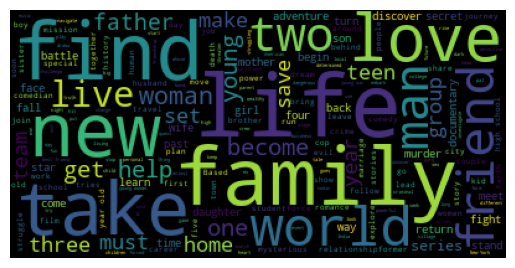

In [105]:
desc = df['description']
# Create and generate a word cloud image:
desc_wordcloud = WordCloud(stopwords=stop_words).generate(' '.join(desc))

# Display the generated image:
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.show()

In [106]:
## words analysis with value counts

In [80]:
def word_analysis(df,columns):
    #lowering the text
    title_process_1=" ".join(df[columns]).lower().split()
    description_process_1=" ".join(df['description']).lower().split()
    #removing punctuation using regex
    title_process_2=[re.sub(r"[^\w\s]",'',t_token) for t_token in title_process_1]
    description_process_2=[re.sub(r"[^\w\s]",'',d_token) for d_token in description_process_1]
    #removing stopwords
    processed_title=[final for final in title_process_2 if final not in stop_words]
    processed_descrp=[final for final in description_process_2 if final not in stop_words]
    
    #using counter function to  get the top 10 most common words
    title_recurrance=Counter(processed_title).most_common(11)[1:]
    description_recuurance=Counter(processed_descrp).most_common(11)[1:]
    
    return title_recurrance,description_recuurance
    
    

In [81]:
tile,des=word_analysis(df,'title')

In [82]:
tile

[('love', 170),
 ('2', 129),
 ('man', 81),
 ('christmas', 78),
 ('life', 76),
 ('story', 75),
 ('movie', 73),
 ('world', 70),
 ('little', 64),
 ('one', 63)]

In [83]:
des

[('life', 774),
 ('young', 728),
 ('new', 699),
 ('family', 570),
 ('love', 497),
 ('two', 495),
 ('man', 491),
 ('world', 491),
 ('friends', 466),
 ('woman', 452)]

Title: most of the shows or content has "Love" --> universal language , "2" --> signifies the part of various shows (recent trend in the decade)

Decription: in description as well it has more words like "love", "young", "life", "world", "freinds" createing a more sense on the movie plots

In [84]:
tile,des=word_analysis(df[df['country']=='India'],'title')

In [85]:
tile

[('2', 16),
 ('ki', 15),
 ('', 14),
 ('aur', 11),
 ('bheem', 10),
 ('love', 10),
 ('mumbai', 10),
 ('dil', 9),
 ('ka', 8),
 ('pyaar', 8)]

In [86]:
des

[('man', 123),
 ('woman', 95),
 ('love', 95),
 ('', 92),
 ('life', 76),
 ('family', 75),
 ('two', 64),
 ('father', 58),
 ('mumbai', 54),
 ('friends', 50)]

In [89]:
tile,des=word_analysis(df[df['country']=='United States'],'title')

In [90]:
tile

[('christmas', 47),
 ('american', 41),
 ('2', 39),
 ('love', 35),
 ('story', 34),
 ('man', 25),
 ('high', 25),
 ('power', 23),
 ('one', 23),
 ('last', 22)]

In [91]:
des

[('new', 287),
 ('life', 274),
 ('documentary', 169),
 ('series', 156),
 ('two', 153),
 ('world', 150),
 ('family', 148),
 ('young', 144),
 ('friends', 134),
 ('school', 127)]

In [93]:
tile,des=word_analysis(df[df['country']=='Canada'],'title')

In [94]:
tile

[('trailer', 10),
 ('boys', 10),
 ('true', 8),
 ('christmas', 8),
 ('monsters', 5),
 ('cop', 5),
 ('day', 4),
 ('', 4),
 ('la', 4),
 ('bad', 4)]

In [95]:
des

[('', 20),
 ('two', 13),
 ('friends', 12),
 ('world', 11),
 ('series', 11),
 ('school', 11),
 ('young', 10),
 ('three', 10),
 ('documentary', 9),
 ('true', 9)]

In [47]:
df['date_added'] = df['date_added'].apply(pd.to_datetime)

In [48]:
last_date = max(df['date_added'])
last_date

Timestamp('2021-09-25 00:00:00')

<a id="9"></a> 
## Question 4 pre_analysis

[back](#0)

In [49]:
last_year_data = df[df['date_added'] > last_date - pd.Timedelta(days = 365)]
last_year_data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

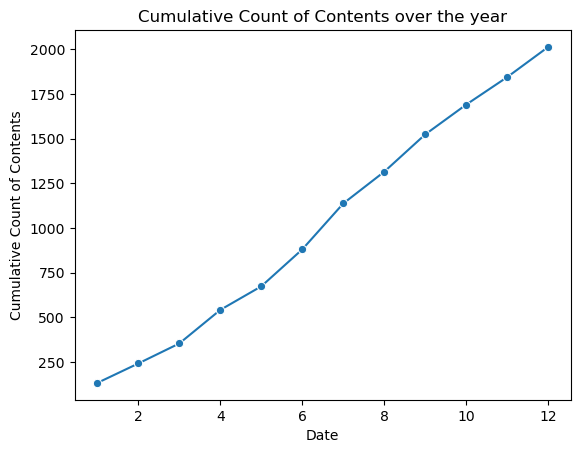

In [50]:
month_group = last_year_data.groupby(last_year_data['date_added'].map(lambda x: x.month))['show_id'].count()
# Calculating cumulative sum
cumulative_sum = month_group.cumsum()

# Plotting the cumulative sum
sns.lineplot(x=month_group.index, y=cumulative_sum, marker = 'o')
plt.xlabel('Date')
plt.ylabel('Cumulative Count of Contents')
plt.title('Cumulative Count of Contents over the year')
plt.show()

In [51]:
second_last_year_data = df[(df['date_added'] < last_date - pd.Timedelta(days = 365)) & (df['date_added'] > last_date - pd.Timedelta(days = 2*365))]
second_last_year_data.head()

show_id     type            title  \
1957   s1958    Movie       Real Steel   
1958   s1959  TV Show    The Chef Show   
1959   s1960    Movie     Enola Holmes   
1960   s1961    Movie  Kiss the Ground   
1961   s1962  TV Show     The Playbook   

                                     director  \
1957                               Shawn Levy   
1958                                      NaN   
1959                           Harry Bradbeer   
1960  Joshua Tickell, Rebecca Harrell Tickell   
1961                                      NaN   

                                                   cast               country  \
1957  Hugh Jackman, Dakota Goyo, Evangeline Lilly, A...  United States, India   
1958                              Jon Favreau, Roy Choi         United States   
1959  Millie Bobby Brown, Henry Cavill, Sam Claflin,...        United Kingdom   
1960                                    Woody Harrelson         United States   
1961                                                NaN         United States   

     date_added  release_year rating   duration  \
1957 2020-09-24          2011  PG-13    127 min   
1958 2020-09-24          2020  TV-MA  4 Seasons   
1959 2020-09-23          2020  PG-13    124 min   
1960 2020-09-22          2020   TV-G     85 min   
1961 2020-09-22          2020  TV-MA   1 Season   

                                              listed_in  \
1957  Action & Adventure, Sci-Fi & Fantasy, Sports M...   
1958                                         Docuseries   
1959  Action & Adventure, Children & Family Movies, ...   
1960                                      Documentaries   
1961                                         Docuseries   

                                            description  
1957  A struggling fighter-turned-promoter reconnect...  
1958  Writer, director and food enthusiast Jon Favre...  
1959  While searching for her missing mother, intrep...  
1960  Science experts and celebrity activists unpack...  
1961  Coaches with championship résumés share their ...

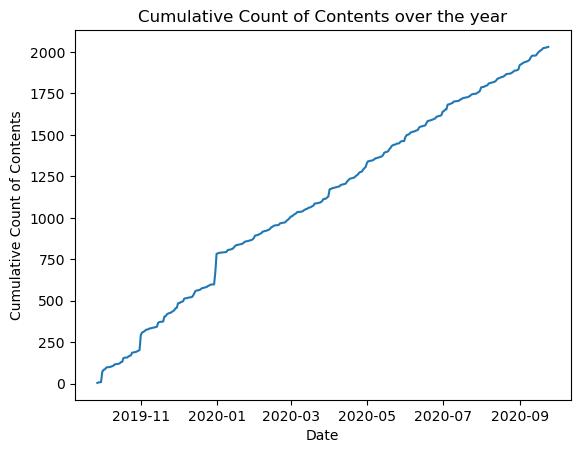

In [52]:

day_group = second_last_year_data.groupby('date_added')['show_id'].count()
# Calculating cumulative sum
cumulative_sum = day_group.cumsum()

# Plotting the cumulative sum
sns.lineplot(x=day_group.index, y=cumulative_sum)
plt.xlabel('Date')
plt.ylabel('Cumulative Count of Contents')
plt.title('Cumulative Count of Contents over the year')
plt.show()

In [53]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [54]:
years=df['date_added'].dt.year.value_counts().index.to_list()

In [55]:
years

[2019.0,
 2020.0,
 2018.0,
 2021.0,
 2017.0,
 2016.0,
 2015.0,
 2014.0,
 2011.0,
 2013.0,
 2012.0,
 2009.0,
 2008.0,
 2010.0]

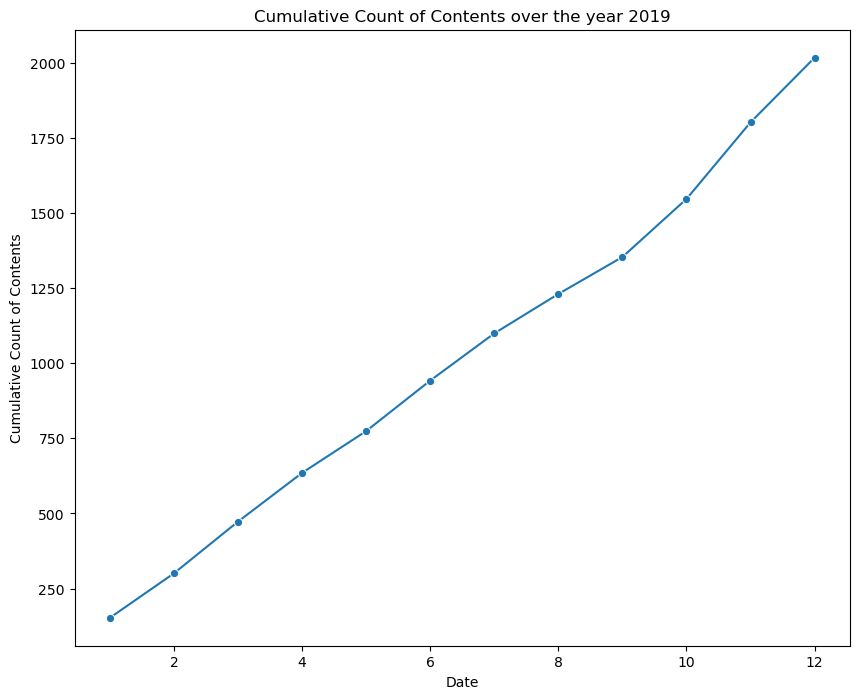

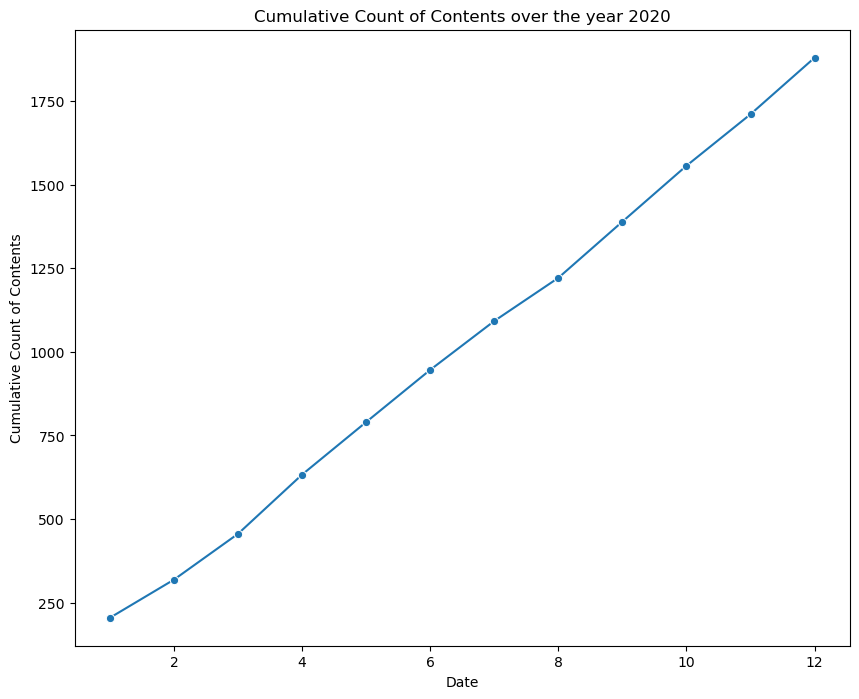

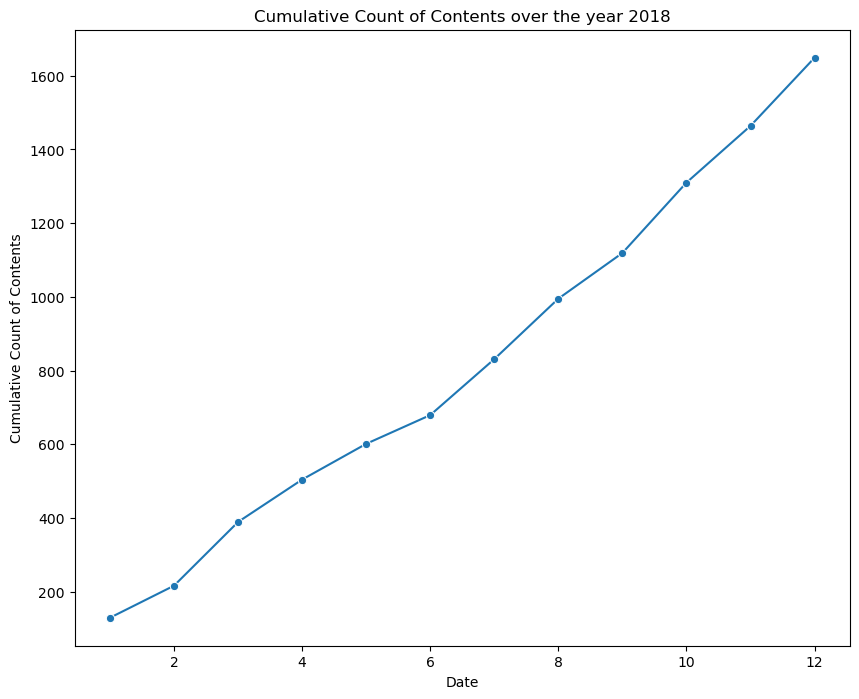

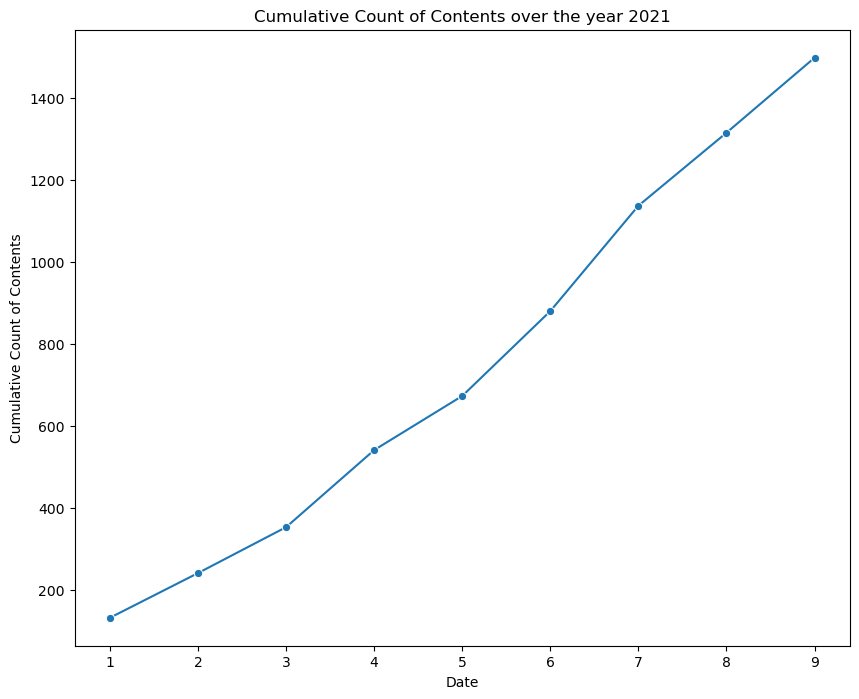

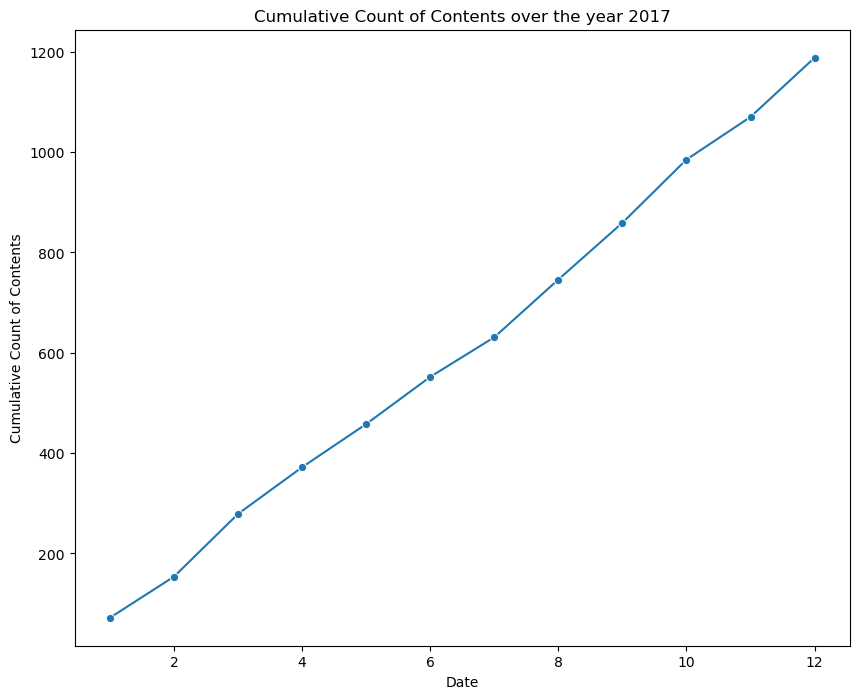

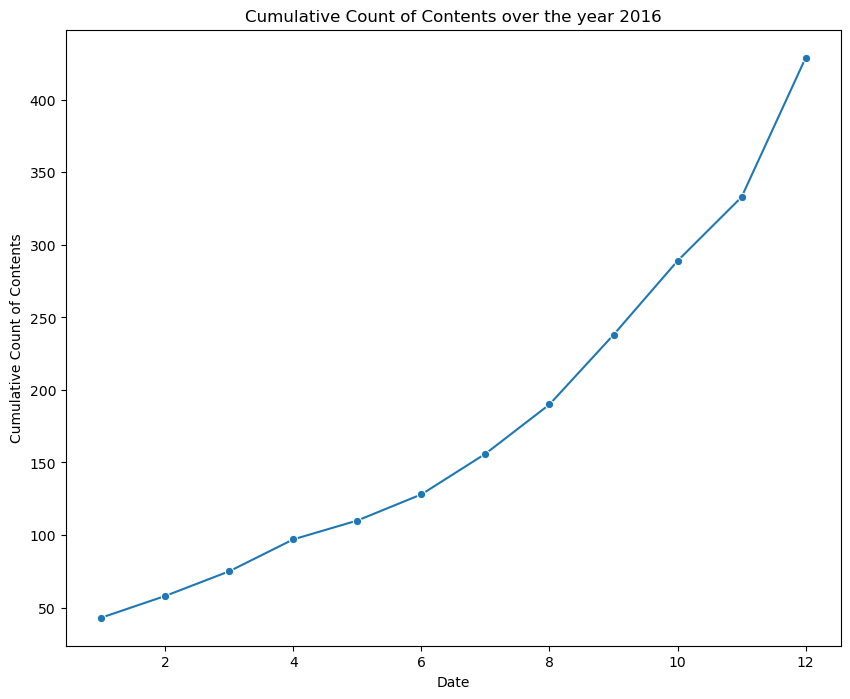

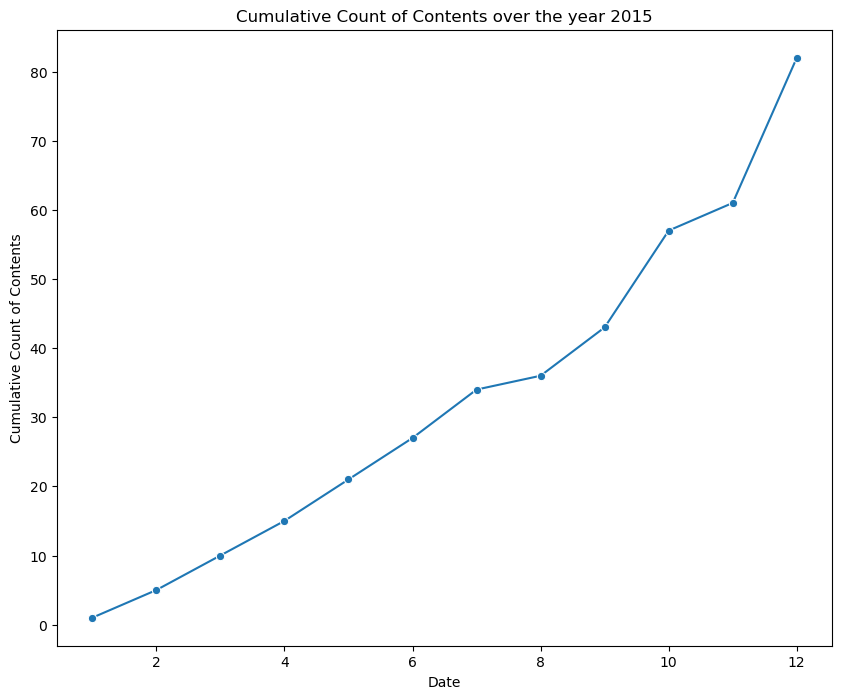

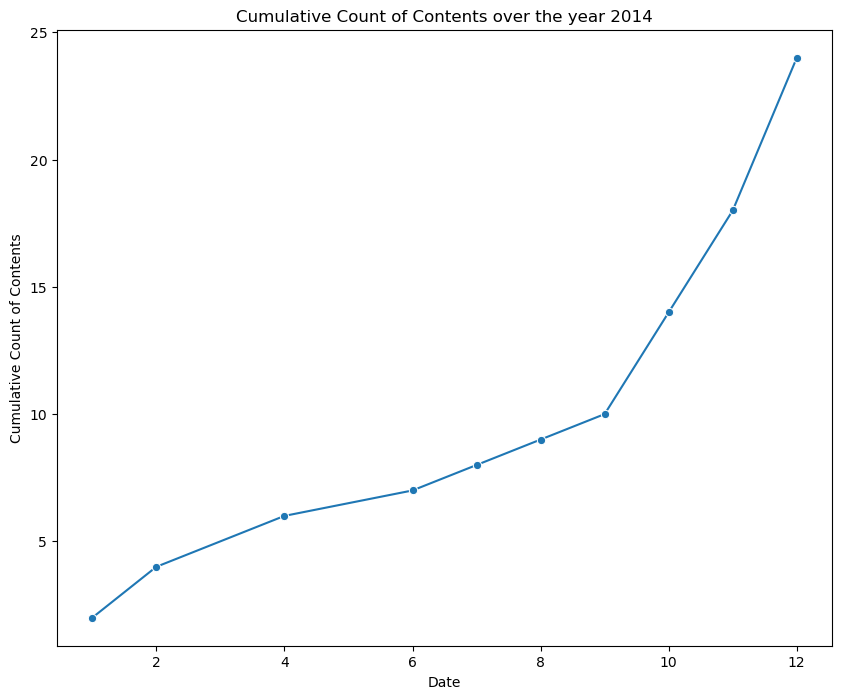

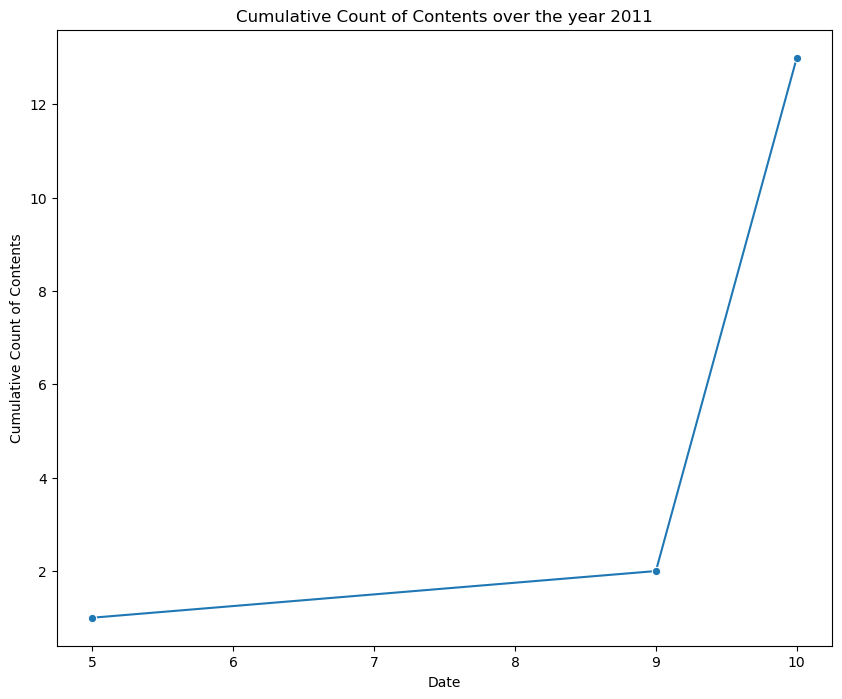

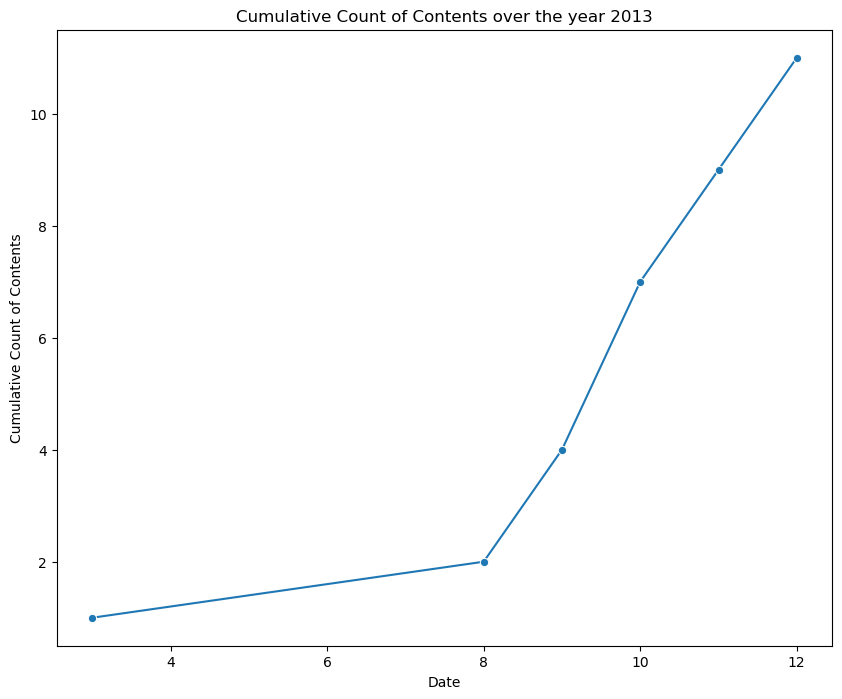

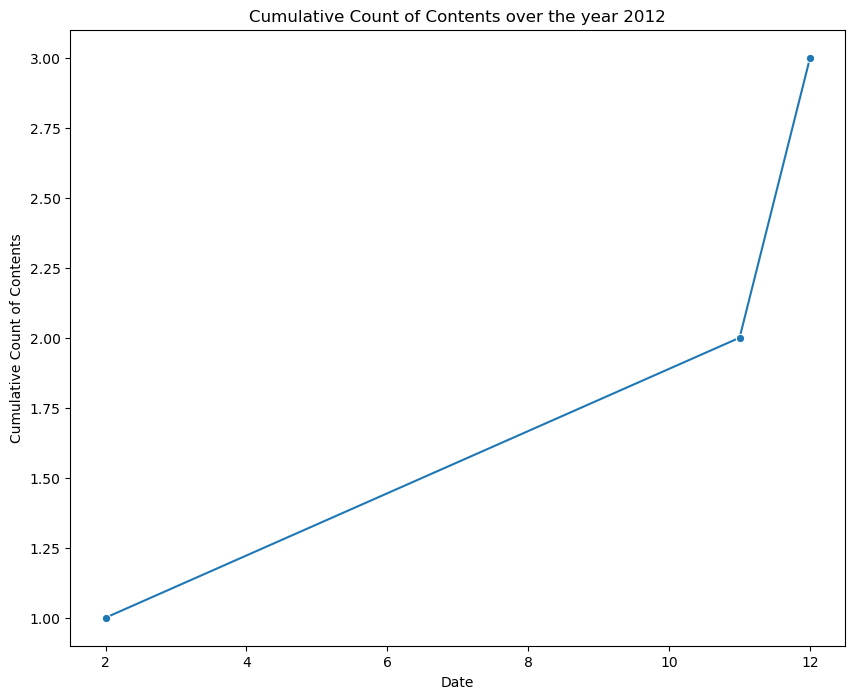

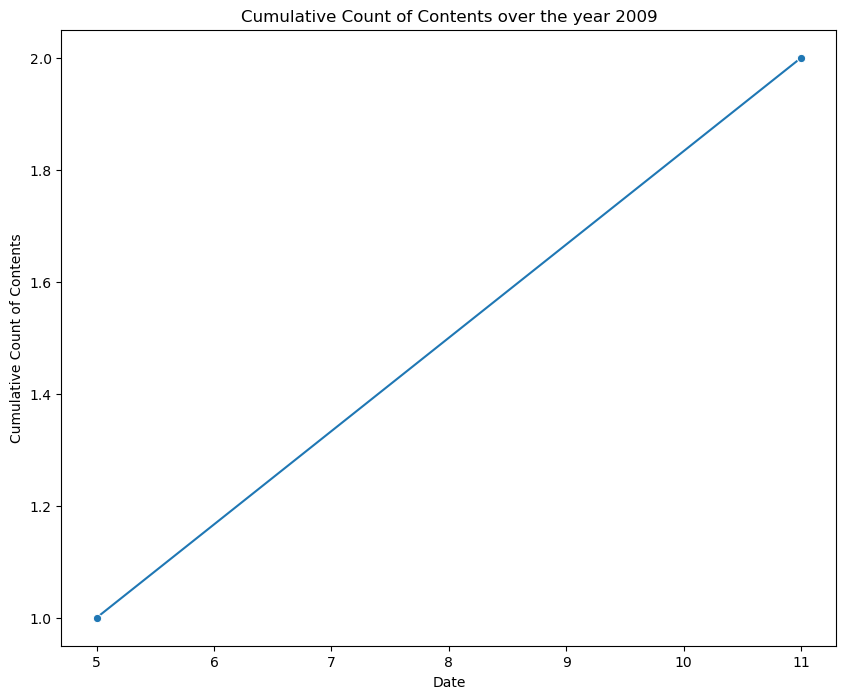

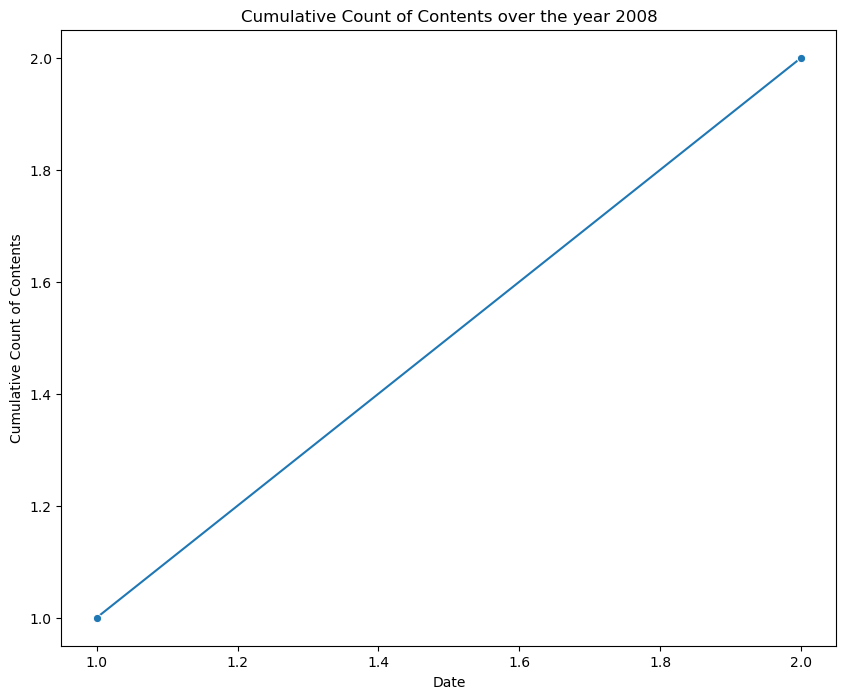

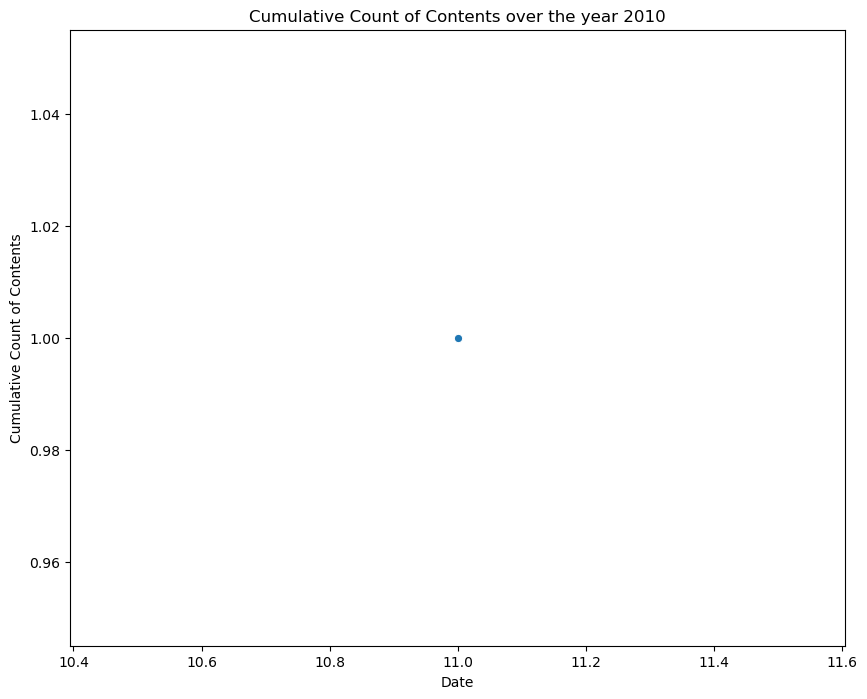

In [56]:
for year in years:
    year_data = df[df['date_added'].dt.year == year]
    month_data = year_data.groupby(year_data['date_added'].dt.month)['show_id'].count()
    # Calculating cumulative sum
    cumulative_sum = month_data.cumsum()

    plt.figure(figsize= (10,8))
    # Plotting the cumulative sum
    sns.lineplot(x=month_data.index, y=cumulative_sum, marker = 'o')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Count of Contents')
    plt.title(f'Cumulative Count of Contents over the year {str(year)[:-2]}')
    plt.show()

<a id="2"></a> 
## year and month analysis

[back](#0)

In [57]:
def gran_check(df):
    #converting and creating required data,month timeframes
    df['date_added']=pd.to_datetime(df['date_added'])
    df['year']=df['date_added'].dt.year
    df['month']=df['date_added'].dt.month_name()
    
    #year wise grp table
    over_year_count=df.groupby(['year','rating']).size().unstack()
    #filling the null values and change the float to int
    over_year_count=over_year_count.fillna(0).astype(int)
    
    
    #month wise grp table
    month_count_table=df.groupby(['year','month']).size().unstack().fillna(0).astype(int)
    
    
    return over_year_count,month_count_table

In [58]:
over_year_count,month_count_table=gran_check(df)

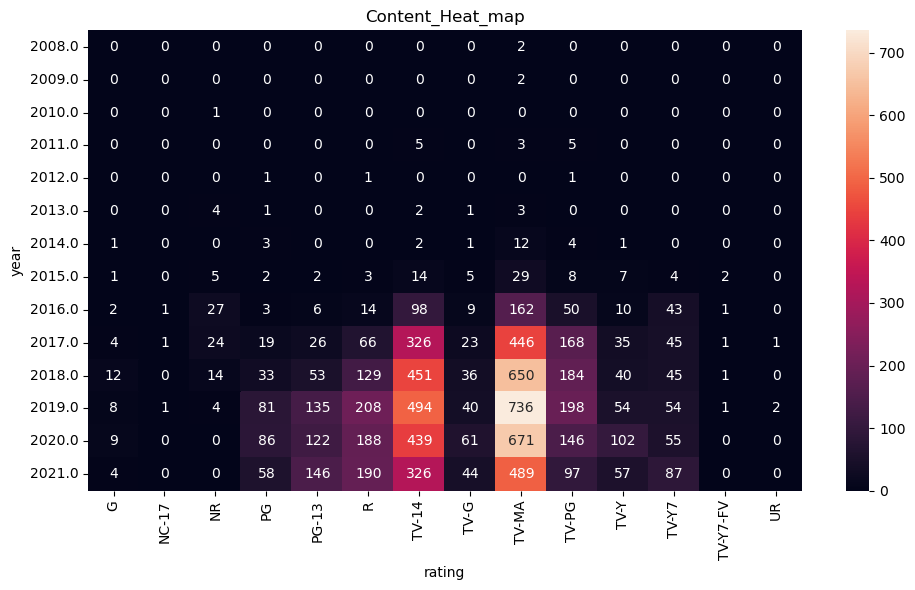

In [59]:
#plotting the heatamp to visualize the rating-content counts 
plt.figure(figsize=(10,6))
sns.heatmap(over_year_count,annot=True,fmt='g')
plt.title('Content_Heat_map')
plt.xlabel('rating')
plt.ylabel('year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<a id="6"></a> 
## Question 4

[back](#0)

In [60]:
over_year_count

rating   G  NC-17  NR  PG  PG-13    R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  TV-Y7  \
year                                                                            
2008.0   0      0   0   0      0    0      0     0      2      0     0      0   
2009.0   0      0   0   0      0    0      0     0      2      0     0      0   
2010.0   0      0   1   0      0    0      0     0      0      0     0      0   
2011.0   0      0   0   0      0    0      5     0      3      5     0      0   
2012.0   0      0   0   1      0    1      0     0      0      1     0      0   
2013.0   0      0   4   1      0    0      2     1      3      0     0      0   
2014.0   1      0   0   3      0    0      2     1     12      4     1      0   
2015.0   1      0   5   2      2    3     14     5     29      8     7      4   
2016.0   2      1  27   3      6   14     98     9    162     50    10     43   
2017.0   4      1  24  19     26   66    326    23    446    168    35     45   
2018.0  12      0  14  33     53  129    451    36    650    184    40     45   
2019.0   8      1   4  81    135  208    494    40    736    198    54     54   
2020.0   9      0   0  86    122  188    439    61    671    146   102     55   
2021.0   4      0   0  58    146  190    326    44    489     97    57     87   

rating  TV-Y7-FV  UR  
year                  
2008.0         0   0  
2009.0         0   0  
2010.0         0   0  
2011.0         0   0  
2012.0         0   0  
2013.0         0   0  
2014.0         0   0  
2015.0         2   0  
2016.0         1   0  
2017.0         1   1  
2018.0         1   0  
2019.0         1   2  
2020.0         0   0  
2021.0         0   0

In [61]:

month_list=df.month.value_counts().index.to_list()
year_list=month_count_table.index.to_list()

In [62]:
month_list

['July',
 'December',
 'September',
 'April',
 'October',
 'August',
 'March',
 'January',
 'June',
 'November',
 'May',
 'February']

In [63]:
academic_year_month_order=['January','February','March','April','May','June'
                           ,'July','August','September','October','November','December']

## month wise analysis

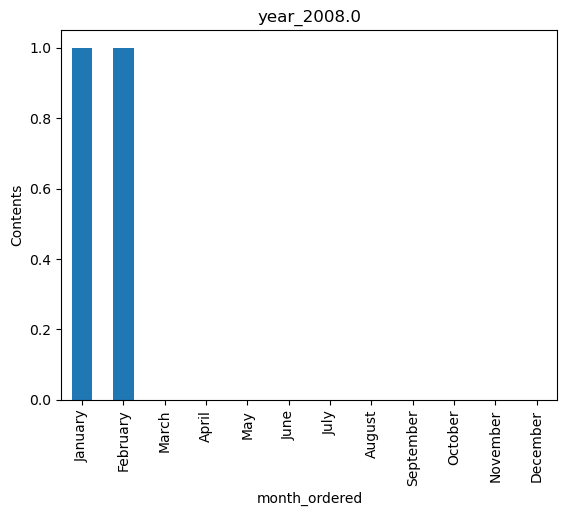

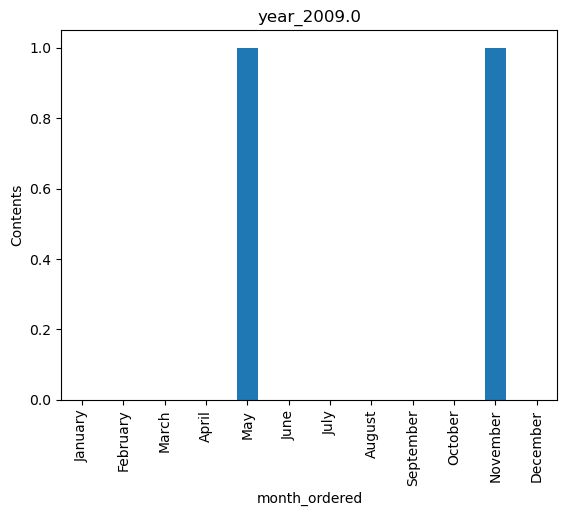

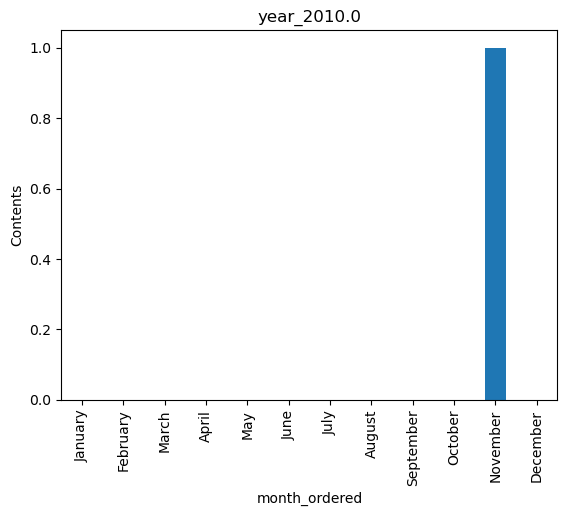

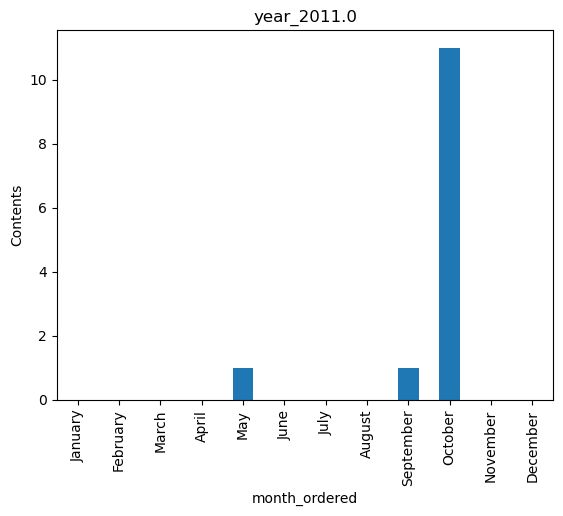

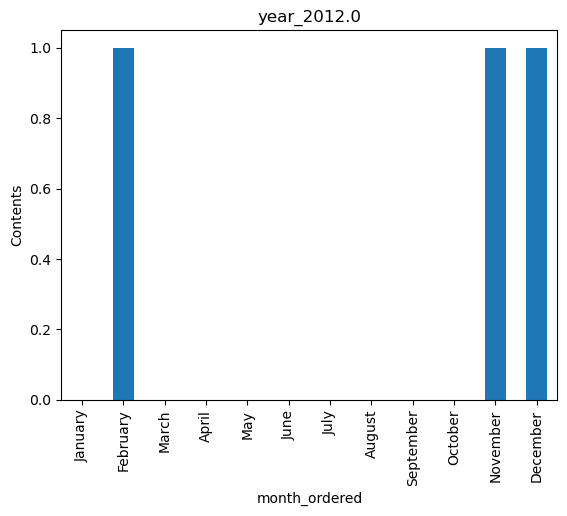

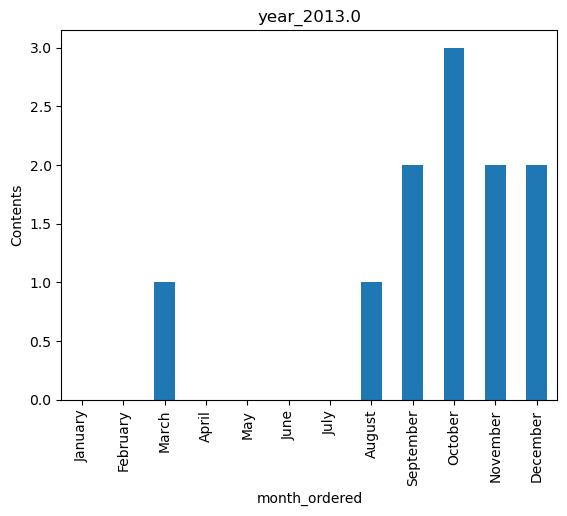

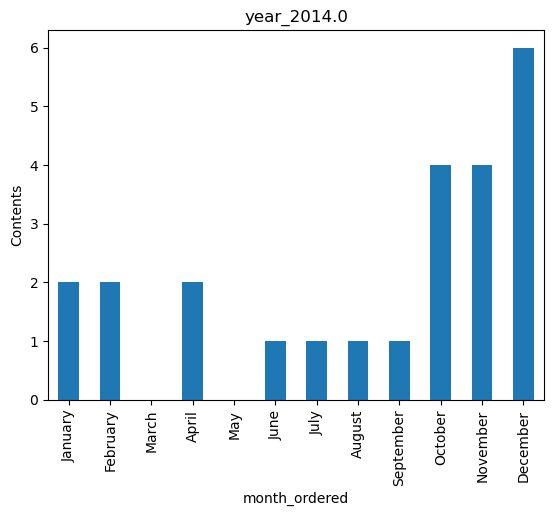

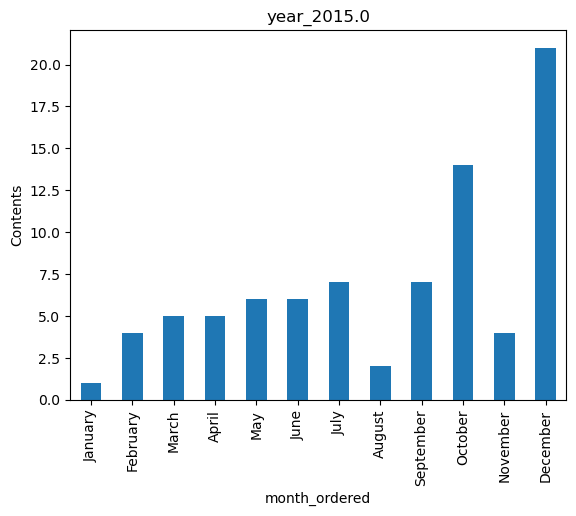

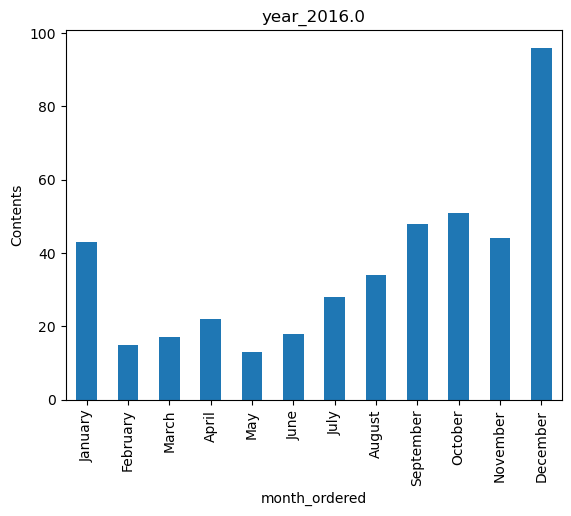

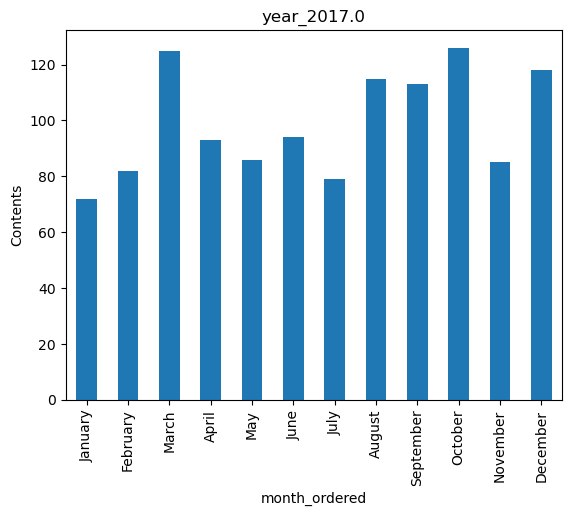

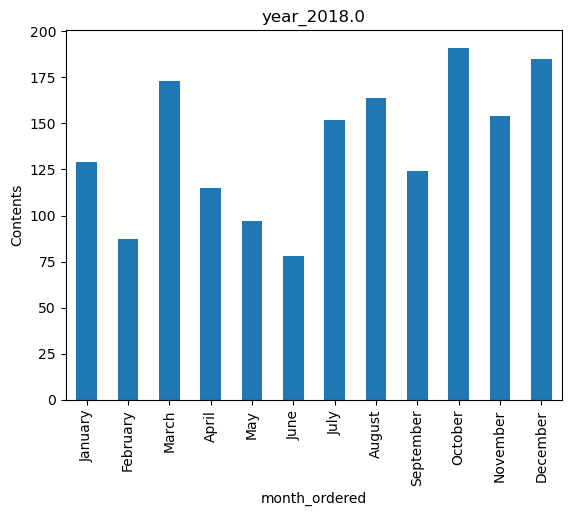

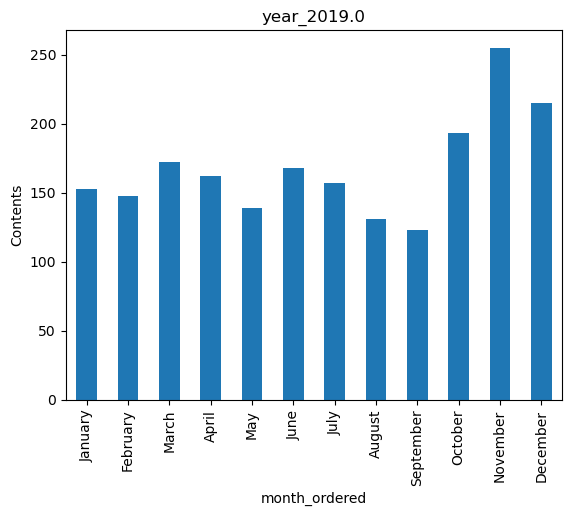

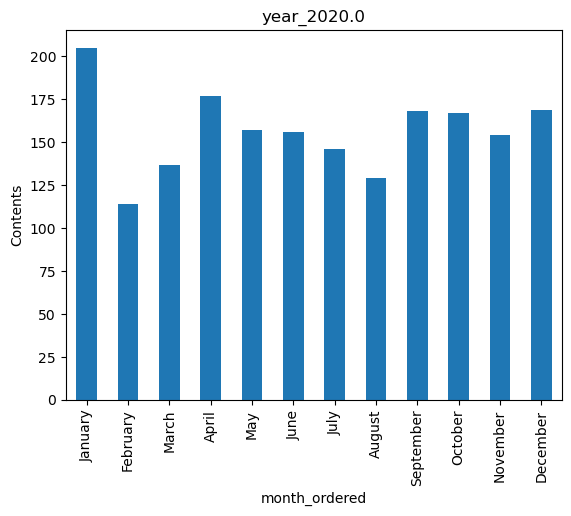

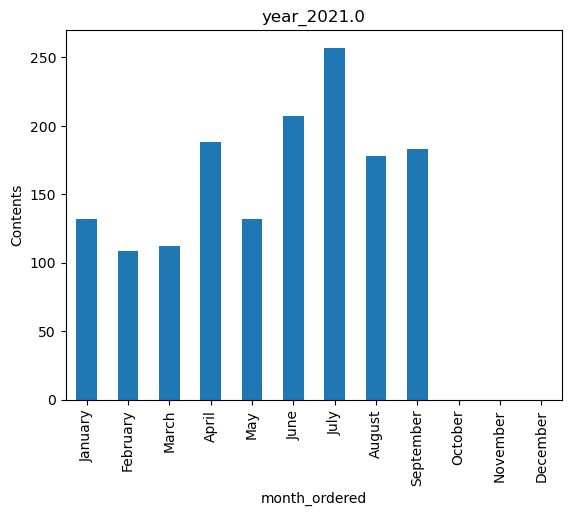

In [64]:
for year in year_list:
    month_count_table.loc[year].loc[academic_year_month_order].plot(kind='bar')
    plt.xlabel("month_ordered")
    plt.ylabel("Contents")
    plt.xticks(rotation=90)
    plt.title("year_{}".format(year))
    plt.show()

<a id="8"></a> 
## most popular rating

[back](#0)

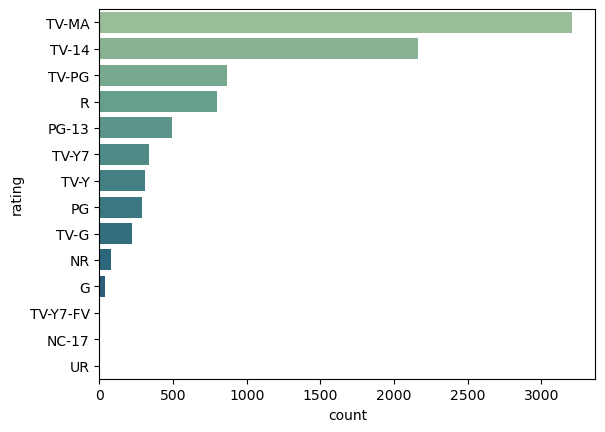

In [65]:
sns.countplot(data = df, y = 'rating', order = df['rating'].value_counts().index.tolist(), palette = 'crest')
plt.show()

In [66]:
df['rating'].value_counts().index.tolist()

['TV-MA',
 'TV-14',
 'TV-PG',
 'R',
 'PG-13',
 'TV-Y7',
 'TV-Y',
 'PG',
 'TV-G',
 'NR',
 'G',
 'TV-Y7-FV',
 'NC-17',
 'UR']

In [67]:
pd.DataFrame(df['rating'].value_counts())

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3

==============================================